# Phần 1. Tổng quan tập dữ liệu

1. Nhập các thư viện cần thiết

In [1697]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

2. Nhập tập dữ liệu

In [1698]:
df = pd.read_csv('heart.csv')

3. Tìm hiểu dữ liệu

3.1 In ra 5 dòng đầu của tập dữ liệu

In [1699]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,male,typical angina,145,233,True,hypertrophy,150,no,2.30,downsloping,0,fixed defect,more chance of heart attack
1,37,male,non-anginal pain,130,250,False,normal,187,no,3.50,downsloping,0,normal,more chance of heart attack
2,41,female,atypical angina,130,204,False,hypertrophy,172,no,1.40,upsloping,0,normal,more chance of heart attack
3,56,male,atypical angina,120,236,False,normal,178,no,0.80,upsloping,0,normal,more chance of heart attack
4,57,female,asymptomatic,120,354,False,normal,163,yes,0.60,upsloping,0,normal,more chance of heart attack


3.2 Thông tin tập dữ liệu

In [1700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    object 
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  caa       303 non-null    int64  
 12  thall     301 non-null    object 
 13  output    303 non-null    object 
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 31.2+ KB


3.3 Kiểm tra số lượng giá trị duy nhất trong mỗi cột

In [1701]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


3.4 Tách các cột theo phân loại và liên tục

⭐ Chia các cột dữ liệu thành các biến phân loại và biến liên tục

In [1702]:
cat_cols = ['sex','cp','fbs','restecg','exng', 'slp', 'caa','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


⭐ Biểu đồ các biến phân loại trong tập dữ liệu

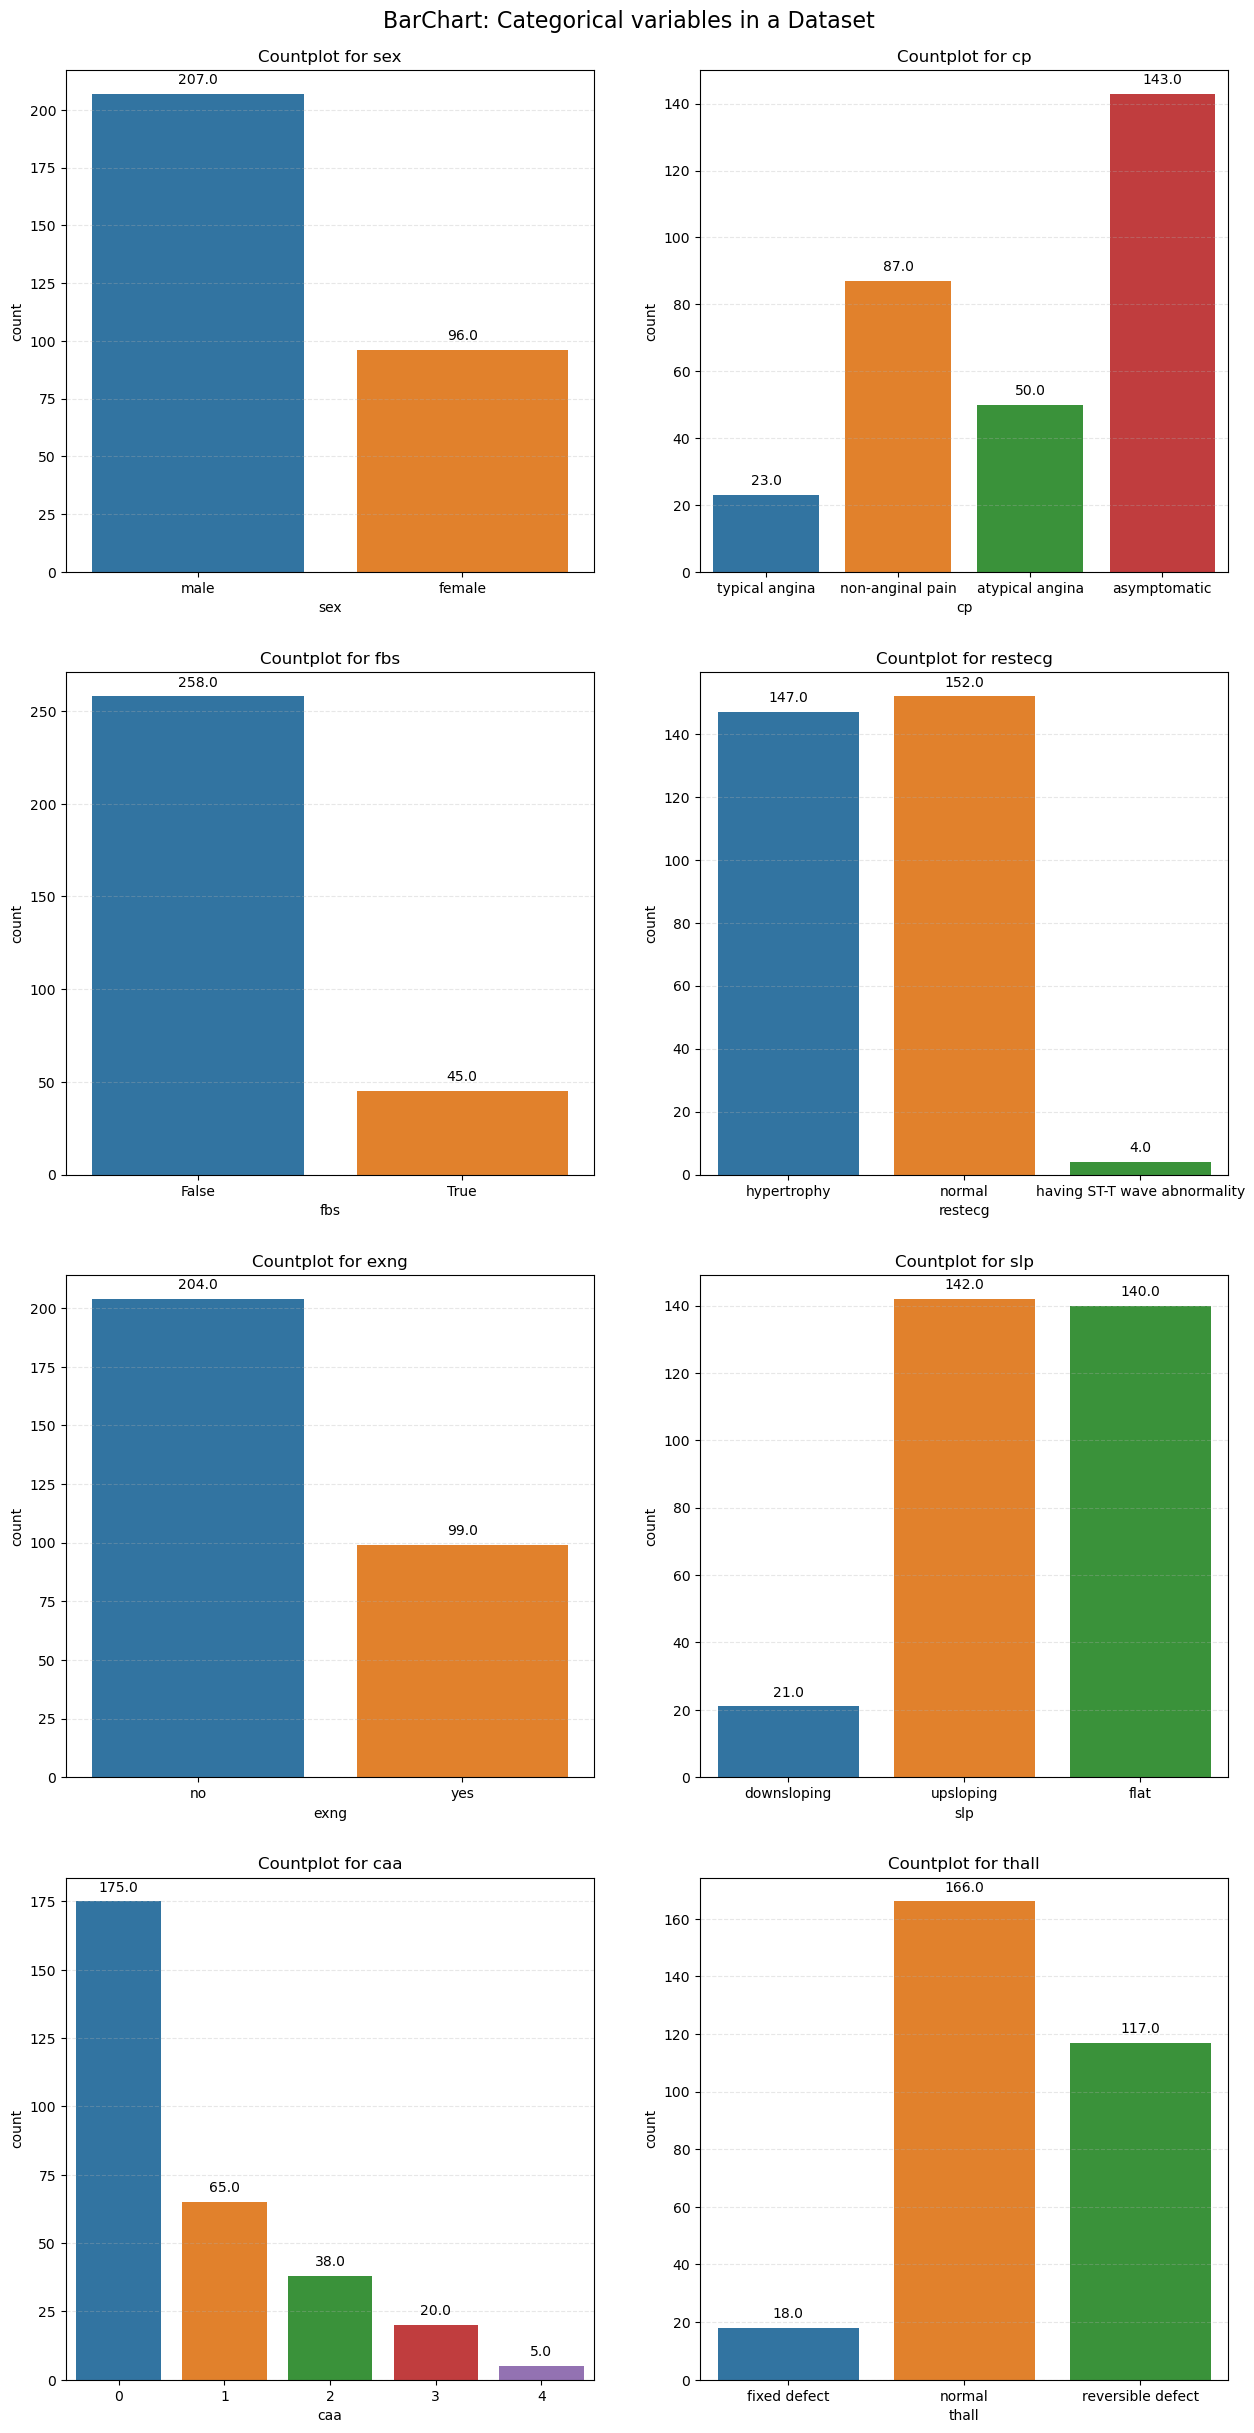

In [1703]:
# Tạo subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 30))

# Duyệt qua các cột và vẽ countplot


for i, ax in zip(df[cat_cols].columns, axes.flatten()):
    sns.countplot(x=i, data=df[cat_cols], ax=ax)
    ax.set_title(f'Countplot for {i}')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Thêm lưới ngang
    for row in axes:
        for ax in row:
            ax.yaxis.grid(True, linestyle='--', alpha=0.3)

plt.suptitle("BarChart: Categorical variables in a Dataset", y=0.9, fontsize=16)  # Thêm tiêu đề chung
plt.show()

⭐ Biểu đồ các biến liên tục trong tập dữ liệu

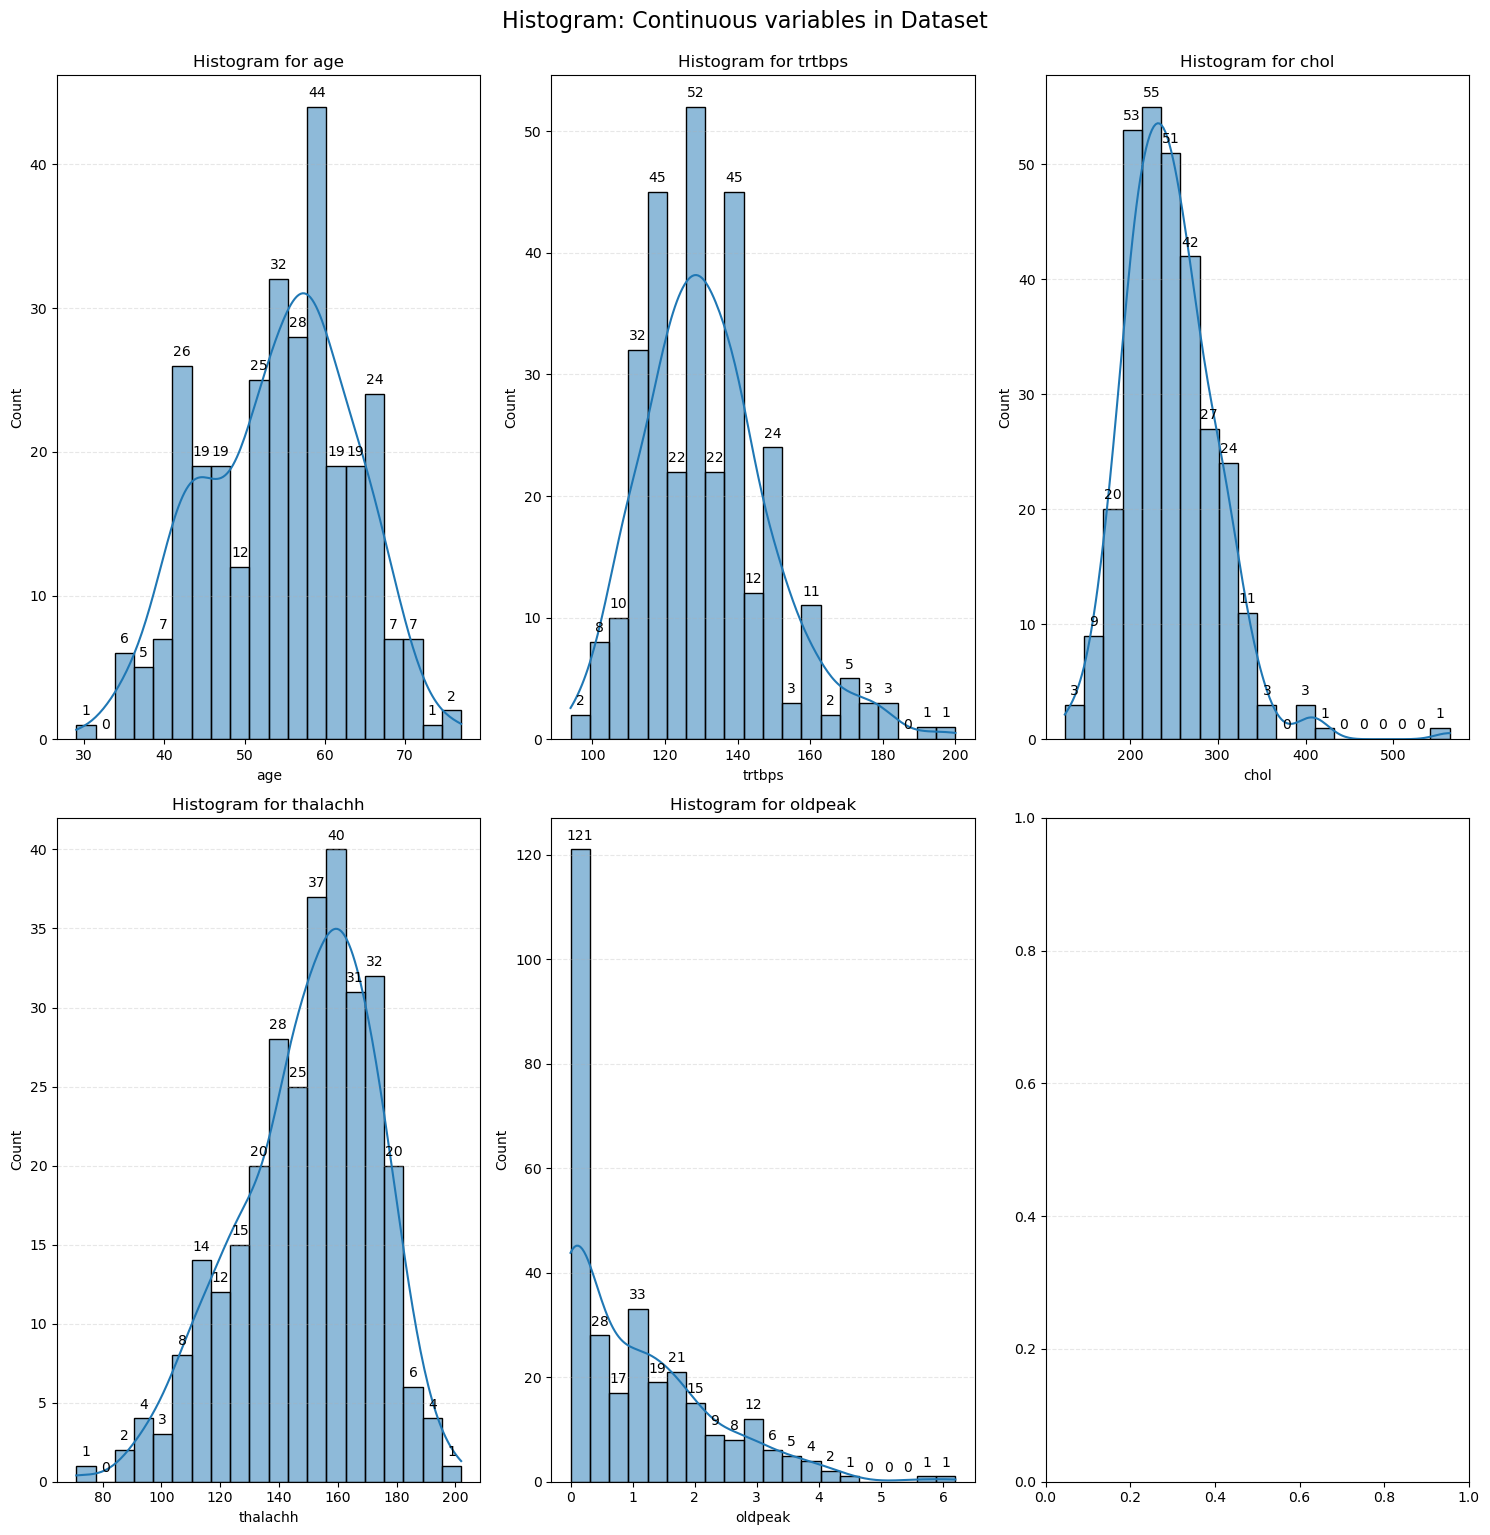

In [1704]:
# Tạo subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Duyệt qua các cột và vẽ histogram
for col, ax in zip(con_cols, axes.flatten()):
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram for {col}')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Thêm lưới ngang
    for row in axes:
        for ax in row:
            ax.yaxis.grid(True, linestyle='--', alpha=0.3)

# Tự chỉnh layout
plt.tight_layout()
plt.suptitle("Histogram: Continuous variables in Dataset", y=1.02, fontsize=16)  # Thêm tiêu đề chung
plt.show()

⭐ Biểu đồ kiểm tra giá trị ngoại lệ trong tập dữ liệu

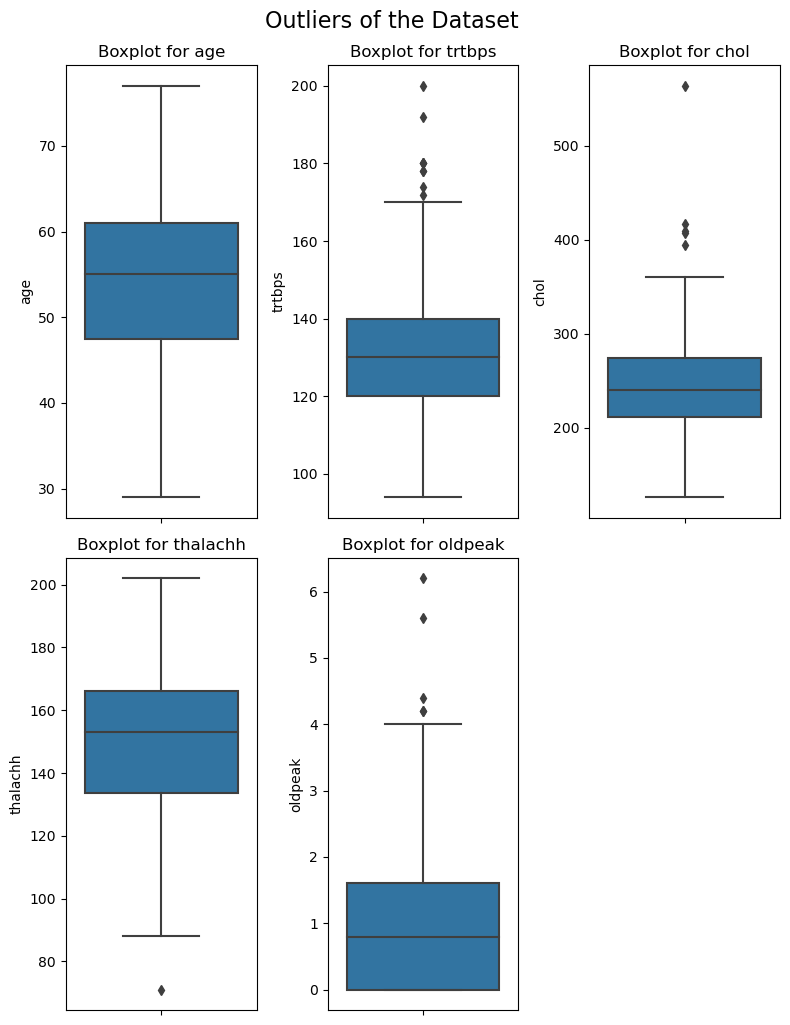

In [1705]:
plt.figure(figsize=(8, 10))

for i, column in enumerate(df[con_cols], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.suptitle("Outliers of the Dataset ", y=1.02, fontsize=16)  # Thêm tiêu đề chung
plt.show()

3.5 Kiểm tra giá trị NaN

In [1706]:
# Kiểm tra giá trị NaN
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       2
output      0
dtype: int64

# 2. Tiền xử lý dữ liệu

2.1 Làm sạch dữ liệu

2.1.1 Kiểm tra những giá trị trùng lặp

In [1707]:
# Kiểm tra các giá trị trùng lặp
df.duplicated().sum()

1

In [1708]:
# In ra cột chứa giá trị trùng lặp
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,male,non-anginal pain,138,175,False,normal,173,no,0.00,upsloping,4,normal,more chance of heart attack


In [1709]:
# Loại bỏ các dòng chứa giá trị trùng lặp
df = df.drop_duplicates()

In [1710]:
# Kiểm tra lại
df.duplicated().sum()

0

2.1.2 Xử lý giá trị NaN

In [1711]:
# Loại bỏ giá trị NaN
df = df.dropna()

In [1712]:
# Kiểm tra lại
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

2.1.3 Chuyển đổi dữ liệu

In [1713]:
df['sex'].replace({'male': 1, 'female': 0}, inplace=True)
df['cp'].replace({'asymptomatic': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'typical angina': 3}, inplace=True)
df['restecg'].replace({'hypertrophy': 0, 'normal': 1, 'having ST-T wave abnormality': 2}, inplace=True)
df['fbs'].replace({True: 1, False: 0}, inplace=True)
df['exng'].replace({'yes': 1, 'no': 0}, inplace=True)
df['slp'].replace({'downsloping': 0, 'flat': 1, 'upsloping': 2}, inplace=True)
df['thall'].replace({'fixed defect': 1, 'normal': 2, 'reversible defect': 3}, inplace=True)
df['output'].replace({'less chance of heart attack': 0, 'more chance of heart attack': 1}, inplace=True)

In [1714]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


2.1.4 Xử lý ngoại lệ